In [1]:
import scipy
import os
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.linear_model import LogisticRegression
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score, recall_score, f1_score

Processing Data

In [2]:
# initial processing of hrrepo.mat
# first = scipy.io.loadmat('first5k.mat')
# first = pd.DataFrame(first['Data'])
# print(first.shape)
# second = scipy.io.loadmat('second5k.mat')
# second = pd.DataFrame(second['Data'])
# print(second.shape)
# original_data = pd.concat([first, second], axis=0)
#original_data.to_csv('original_data.csv')
HRrepo = pd.read_csv('original_data.csv')
original_data = HRrepo.iloc[:, :-1]
label = HRrepo.iloc[:, -1]

In [3]:
original_data

,0,1,2,3,4,5,6,7,8,9,10,11
0,-0.338249,-0.062922,-0.371273,-0.387709,-0.093143,-0.933171,-1.009011,-0.742666,-0.897017,0.292315,-0.654816,-0.653255
1,-0.102809,0.113721,-0.081931,-0.088746,0.034047,-0.912533,-0.982349,-0.668274,-0.888731,0.232756,-0.407850,-0.389414
2,-0.172016,0.096038,-0.120848,-0.118194,0.109173,-0.921779,-0.993501,-0.726530,-0.910598,0.218340,-0.437457,-0.430122
3,0.032695,0.092936,-0.138741,-0.151341,0.057070,-0.719632,-0.964179,-0.487042,-0.988344,0.134845,-0.464718,-0.444414
4,0.093930,0.238736,-0.034154,-0.043391,0.166887,-0.804060,-0.978715,-0.627480,-0.954665,0.156526,-0.337923,-0.337056
...,...,...,...,...,...,...,...,...,...,...,...,...
8573,-0.116360,-0.109649,-0.148549,-0.181590,-0.060174,-0.856132,-0.976953,-0.755428,-0.993203,0.101406,-0.641783,-0.938215
8574,-0.213425,-0.006731,-0.067747,-0.098728,-0.009333,-0.920717,-1.007827,-0.947413,-1.025644,0.067375,-0.564412,-0.930628
8575,0.330957,0.614256,0.530395,0.493166,0.521254,-0.929010,-1.019980,-0.915470,-0.983862,0.181192,0.177812,-0.823345
8576,-0.230843,0.014638,-0.057877,-0.088419,-0.044708,-0.957891,-0.995015,-0.953828,-0.999220,0.071552,-0.564105,-0.940329


In [4]:
#function for processing the predictions
def half_process(main_dir):
    score_df, label_df = [], []
    # Iterate through each folder
    for folder_name in os.listdir(main_dir):
        folder_path = os.path.join(main_dir, folder_name)
        
        # Check if it's a directory
        if os.path.isdir(folder_path):
            
            # Iterate through each file in the folder
            for file_name in os.listdir(folder_path):
                file_path = os.path.join(folder_path, file_name)
                
                # Check if it's a .mat file
                if file_name.endswith('scores.mat'):
                    mat_data = scipy.io.loadmat(file_path)
                    data = pd.DataFrame(mat_data['validationScores']).iloc[:, [1]]
                    file_column_name = f"{file_name[:-15]}"  # Remove '.mat' extension from filename
                    data.columns = [f"{file_column_name}"]
                    score_df.append(data)
                    
                elif file_name.endswith('labels.mat'):
                    mat_data = scipy.io.loadmat(file_path)
                    data = pd.DataFrame(mat_data['validationPredictions'])
                    file_column_name = f"{file_name[:-15]}"  # Remove '.mat' extension from filename
                    data.columns = [f"{file_column_name}"]
                    label_df.append(data)
                    
    score_df = pd.concat(score_df, axis=1)
    label_df = pd.concat(label_df, axis=1)
    
    return score_df, label_df          


In [5]:
#processing the predictions
# main_dir = os.getcwd()
# main_dir_1 = os.path.join(main_dir, '5kClassification_Outputs')
# main_dir_2 = os.path.join(main_dir, '10kClassification_Outputs')
# 
# first_score, first_label = half_process(main_dir_1)
# print(first_score.shape)
# print(first_label.shape)    
# second_score, second_label = half_process(main_dir_2)
# print(second_score.shape)
# print(second_label.shape)    
# score_df = pd.concat([first_score, second_score], axis=0)
# label_df = pd.concat([first_label, second_label], axis=0)
# score_df.to_csv('score_df.csv')
# label_df.to_csv('label_df.csv')

score_df = pd.read_csv('score_df.csv')
label_df = pd.read_csv('label_df.csv')
print(score_df.shape)
print(label_df.shape)    

(8578, 8)
(8578, 8)


In [6]:
score_df.head()

,SVM_Linear,KNN,LinearDiscriminant,DecisionTree,RandomForest,AdaBoost,SVM_Gauss,LogisticRegression
0,1.267544,0.609914,0.714570,1.000000,0.383333,0.688081,-0.877358,0.747430
1,1.619844,0.759934,0.758471,0.214225,0.450000,0.667738,-0.221359,0.768831
2,1.590387,0.730166,0.751959,0.066719,0.316667,0.370090,-0.786911,0.762864
3,0.950962,0.619915,0.725116,0.111194,0.166667,-0.272863,-0.843127,0.740684
4,0.706509,0.660054,0.645860,0.931484,0.550000,0.728948,0.358276,0.653463


In [7]:
label_df.head()

,SVM_Linear,KNN,LinearDiscriminant,DecisionTree,RandomForest,AdaBoost,SVM_Gauss,LogisticRegression
0,1,1,1,1,-1,1,-1,1
1,1,1,1,-1,-1,1,-1,1
2,1,1,1,-1,-1,1,-1,1
3,1,1,1,-1,-1,-1,-1,1
4,1,1,1,1,1,1,1,1


Exploratory Analysis

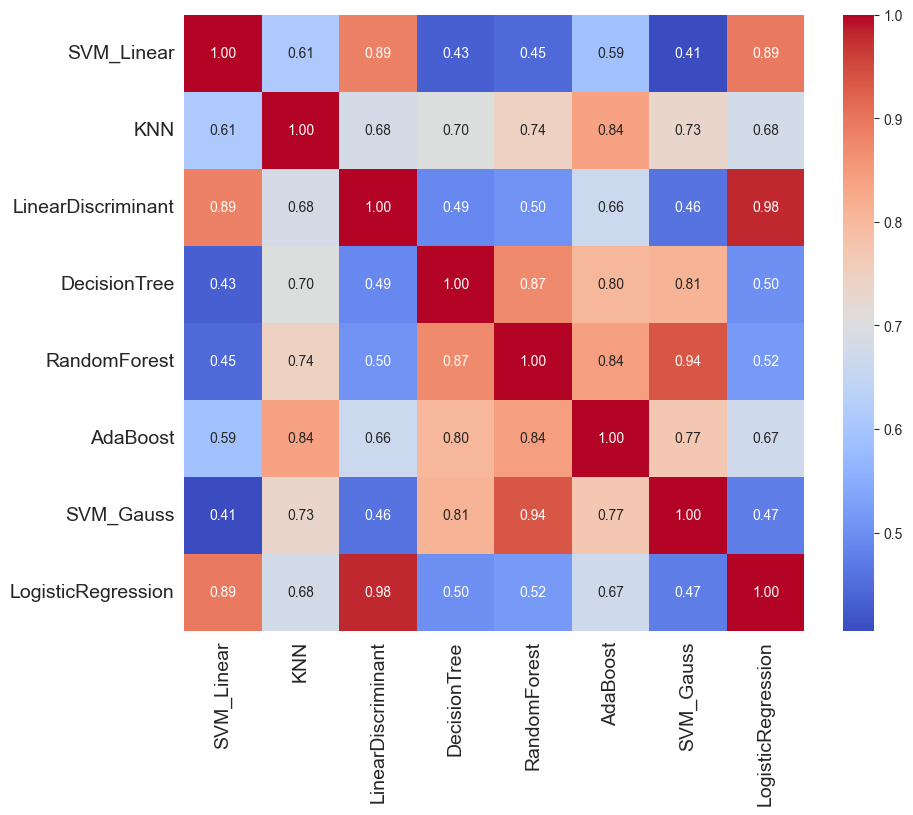

In [8]:
# Compute correlation matrix
correlation_matrix = score_df.corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Linear Dependence Between Prediction Scores')
plt.tick_params(axis='both', labelsize=10)
plt.show()

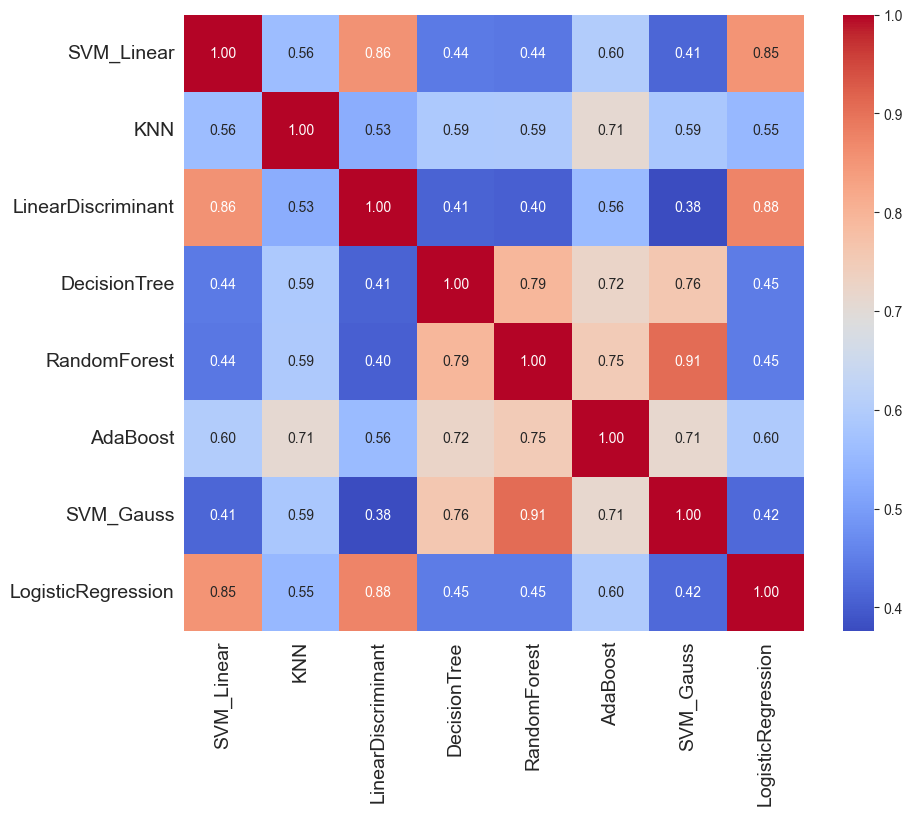

In [9]:
# Compute correlation matrix
correlation_matrix = label_df.corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Linear Dependence Between Prediction Labels')
plt.tick_params(axis='both', labelsize=10)
plt.show()

Stacking Experiments

In [10]:
def run_replication():
    replication = {}
    # Iterate over each column (model) in the predictions dataframe
    for model in label_df.columns:
        # Get the predicted labels for the current model
        predicted_labels = label_df[model]
        # Calculate precision, recall, and F1 score
        precision = precision_score(label, predicted_labels, average='macro')
        recall = recall_score(label, predicted_labels, average='macro')
        f1 = f1_score(label, predicted_labels, average='macro')
        # Store the scores in the dictionary
        replication[model] = [precision, recall, f1]
    
    # Create a dataframe from the dictionary
    replication_df = pd.DataFrame.from_dict(replication, orient='index', columns=['Precision', 'Recall', 'F1'])
    replication_df = replication_df.sort_values(by=replication_df.columns[-1], ascending=False)
    return replication_df

def get_data(Source, Rescan):
    res = score_df if Source == 'Scores' else label_df
    if Rescan:
        res = pd.concat([res, original_data], axis=1)
    return res

def get_assessment(model, X_test, y_test, Source, experiment_format):
    cv = KFold(n_splits=10, shuffle=True, random_state=42)
    precision_scores = cross_val_score(model, X_test, y_test, cv=cv, scoring='precision')
    recall_scores = cross_val_score(model, X_test, y_test, cv=cv, scoring='recall')
    f1_scores = cross_val_score(model, X_test, y_test, cv=cv, scoring='f1')
    return f"{Source} {experiment_format}", [np.mean(precision_scores), np.mean(recall_scores), np.mean(f1_scores)]

def pad_dict(my_dict):
    max_length = max(len(arr) for arr in my_dict.values())
    # Pad shorter arrays with zeros
    for key, value in my_dict.items():
        if len(value) < max_length:
            padding = np.zeros(max_length - len(value), dtype=value.dtype)
            my_dict[key] = np.concatenate([value, padding])
    return my_dict
    
def perform_experiments():
    score_report, weight_report = {}, {}
    for Source in ['Scores', 'Labels']:
        for Rescan in [True, False]:
            X = get_data(Source, Rescan)
            #X_scaled = StandardScaler().fit_transform(X)
            X_train, X_test, y_train, y_test = train_test_split(X, label, test_size=0.2, random_state=42)
            model = LogisticRegression(C=1)
            model.fit(X_train, y_train)
            key, value = get_assessment(model, X_test, y_test, Source, experiment_format = 'Without Rescan' if Rescan == False else 'With Rescan')
            score_report[key] = value
            weight_report[key] = model.coef_[0]
    weight_report = pad_dict(weight_report)
    score_report_df = pd.DataFrame.from_dict(score_report, orient='index', columns=['Precision', 'Recall', 'F1'])
    weight_report_df = pd.DataFrame.from_dict(weight_report, orient='index', columns=pd.concat([score_df, original_data], axis=1).columns)
    return score_report_df, weight_report_df
    

In [11]:
replication_df = run_replication()
replication_df

,Precision,Recall,F1
RandomForest,0.963519,0.963515,0.963511
SVM_Gauss,0.951538,0.951065,0.951026
DecisionTree,0.881144,0.880992,0.880964
AdaBoost,0.856505,0.851266,0.850801
KNN,0.775689,0.773906,0.773488
LogisticRegression,0.713610,0.711270,0.710537
SVM_Linear,0.715488,0.705702,0.702445
LinearDiscriminant,0.693545,0.688609,0.686700


In [12]:
score_report_df, weight_report_df = perform_experiments()
score_report_df

,Precision,Recall,F1
Scores With Rescan,0.964038,0.964971,0.964403
Scores Without Rescan,0.969177,0.961449,0.965113
Labels With Rescan,0.964723,0.970357,0.967436
Labels Without Rescan,0.964026,0.976845,0.970277


In [13]:
weight_report_df

,SVM_Linear,KNN,LinearDiscriminant,DecisionTree,RandomForest,AdaBoost,SVM_Gauss,LogisticRegression,0,1,2,3,4,5,6,7,8,9,10,11
Scores With Rescan,0.183529,-4.656670,0.398249,-0.080729,7.691238,-0.091182,2.497945,0.265871,0.398915,0.582806,-0.054850,-0.158197,-0.188013,0.037926,0.180909,-1.181794,-0.805861,0.033203,-0.323319,0.160316
Scores Without Rescan,0.149193,-4.163865,0.758543,-0.239990,8.136733,-0.206849,2.296337,0.379934,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Labels With Rescan,0.328865,-0.846858,-0.179119,0.437637,2.128968,0.122340,1.840295,0.129002,0.866696,1.040406,-0.309167,-0.558862,-0.468276,0.257665,0.346583,-0.911562,-0.785753,0.202822,-0.395944,-0.305607
Labels Without Rescan,0.355719,-0.687632,-0.184400,0.331110,2.171589,0.050738,1.760359,0.115065,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


Using only the easy-to-interpret models

In [14]:
columns_to_drop = ['RandomForest', 'AdaBoost', 'DecisionTree']
score_df = score_df.drop(columns=columns_to_drop)
label_df = label_df.drop(columns=columns_to_drop)
replication_df = run_replication()
replication_df

,Precision,Recall,F1
SVM_Gauss,0.951538,0.951065,0.951026
KNN,0.775689,0.773906,0.773488
LogisticRegression,0.713610,0.711270,0.710537
SVM_Linear,0.715488,0.705702,0.702445
LinearDiscriminant,0.693545,0.688609,0.686700


In [15]:
score_report_df, weight_report_df = perform_experiments()
score_report_df

,Precision,Recall,F1
Scores With Rescan,0.954617,0.953275,0.953761
Scores Without Rescan,0.954508,0.943365,0.948820
Labels With Rescan,0.960868,0.938377,0.949308
Labels Without Rescan,0.970473,0.933394,0.951268


In [16]:
weight_report_df

,SVM_Linear,KNN,LinearDiscriminant,SVM_Gauss,LogisticRegression,0,1,2,3,4,5,6,7,8,9,10,11
Scores With Rescan,0.139224,-3.082462,0.559066,4.673098,0.822258,0.370544,0.664501,-0.340748,-0.491261,-0.440469,-0.283859,-0.154537,-1.062932,-1.151971,0.197468,-0.026139,0.079511
Scores Without Rescan,0.140830,-3.054524,1.182993,4.671127,0.771393,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Labels With Rescan,0.455910,0.038408,-0.123240,2.939642,0.225521,-0.105397,0.857661,-0.491093,-0.378324,-0.267176,0.040623,0.432174,-0.395098,-0.660757,-0.233024,0.286478,-0.079375
Labels Without Rescan,0.324728,0.046611,-0.085394,2.865402,0.316374,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
